<h1>Análise dos Dados Quantitativos e Nutricionais do Menu do McDonald's</h1>


Dataset obtido através do Kaggle:<br>
https://www.kaggle.com/datasets/mcdonalds/nutrition-facts



##Uma imagem vale mais do que mil palavras.
###A Visualização de Dados é uma forma de representar informações complexas de modo gráfico e facilmente compreensível.

###Importando bibliotecas que serão utilizadas no decorrer da análise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mc_data = "/content/drive/MyDrive/mcdonalds/menu_mcdonalds.csv"
mc_df = pd.read_csv("/content/drive/MyDrive/mcdonalds/menu_mcdonalds.csv")

###Conferindo as 5 primeiras linhas do dataframe criado.

In [ ]:
mc_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


###Dimensões do dataframe (linhas e colunas).

In [ ]:
print(f'Quantidade de linhas: {mc_df.shape[0]}')
print(f'Quantidade de colunas: {mc_df.shape[1]}')

Quantidade de linhas: 260
Quantidade de colunas: 24


In [ ]:
nome_colunas = []
for col in mc_df.columns:
  nome_colunas.append(col)
nome_colunas

['Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

###Distribuição dos itens do menu por categoria.



In [ ]:
# separando os resultados em um dataframe próprio
categorias = mc_df.groupby('Category').count()
itens_categoria = categorias['Item'].groupby('Category').sum().sort_values(ascending=False).reset_index()

Plotando o gráfico

Gráfico Pizza

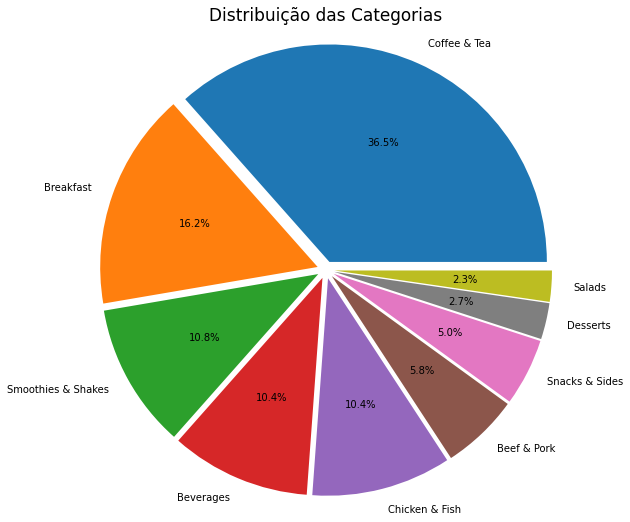

In [ ]:
separacao =[]
for i in range(len(itens_categoria)):
  separacao.append(0.1)

plt.pie(itens_categoria['Item'], labels=itens_categoria['Category'], radius=2.5,explode=separacao, autopct='%1.1f%%')
plt.title('Distribuição das Categorias', pad=140, fontsize=17)
plt.show()

Gráfico de Colunas Verticais

[Text(0, 0.5, 'Categoria'), Text(0.5, 0, 'Quantidade')]

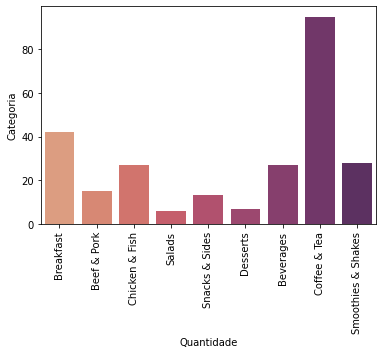

In [ ]:
grafico = sns.countplot(x='Category', data=mc_df, palette='flare')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=90)
grafico.set(xlabel='Quantidade',ylabel='Categoria')

####Observação
<p>Ao contrário do que o senso comum pode nos induzir a acreditar, a grande maioria dos itens comercializados pela rede McDonald's são das categorias 'Café e Chá' (36.5%) e 'Café da Manhã'(16.2%).
</p>



###Distribuição calórica do menu do McDonald's.

Colunas: *Calories*, *Calories From Fa*t e *Total Fat*

In [ ]:
# função responsável pela plotagem dos gráficos que serão utlizados nesta análise
def diagrama_de_caixa(item1, item2, item3):
  plt.rcParams["figure.figsize"] = [15.00, 10.0]
  plt.rcParams["figure.autolayout"] = True
  # exibindo os 3 gráficos de uma única vez
  fig, axes = plt.subplots(3,1)

  fig.subplots_adjust(hspace=0.3, wspace=0.125)

  sns.boxplot(x=mc_df[item1], color='b',ax=axes[0])
  sns.boxplot(x=mc_df[item2], color='g',ax=axes[1])
  sns.boxplot(x=mc_df[item3], color='r',ax=axes[2])

  plt.show()

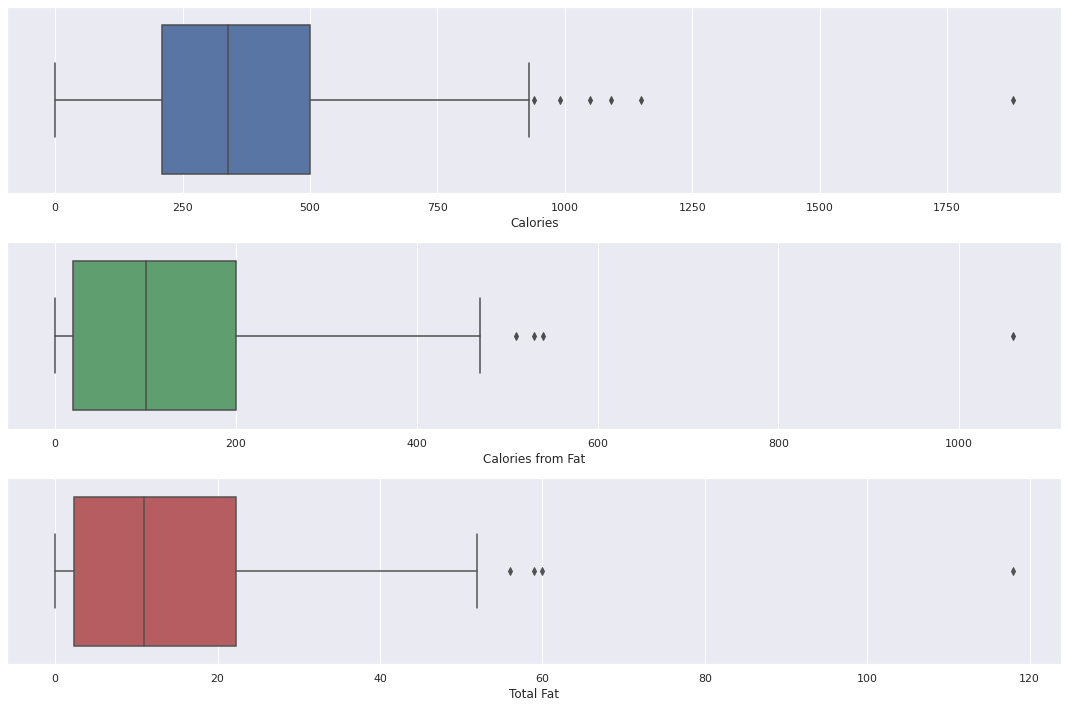

In [ ]:
# exibindo
diagrama_de_caixa('Calories', 'Calories from Fat', 'Total Fat')

####Observação
<p>Analisando os gráficos acima podemos observar que os valores calóricos dos iten comercializado pela rede McDonald's possuem uma alta variabilidade, tendo como **outliers** valores acima das 1000 calorias. A grande concentração se dá na faixa compreendida entre 200 e 500 calorias, concentração esta possivelmente explicada pelo fato de que a maioria os itens comercializados são da categoria "Café e Chá".</p>

###Colesterol, Gordura Saturada e Gordura Trans

Análise da concentração e variabiliade destes valores.

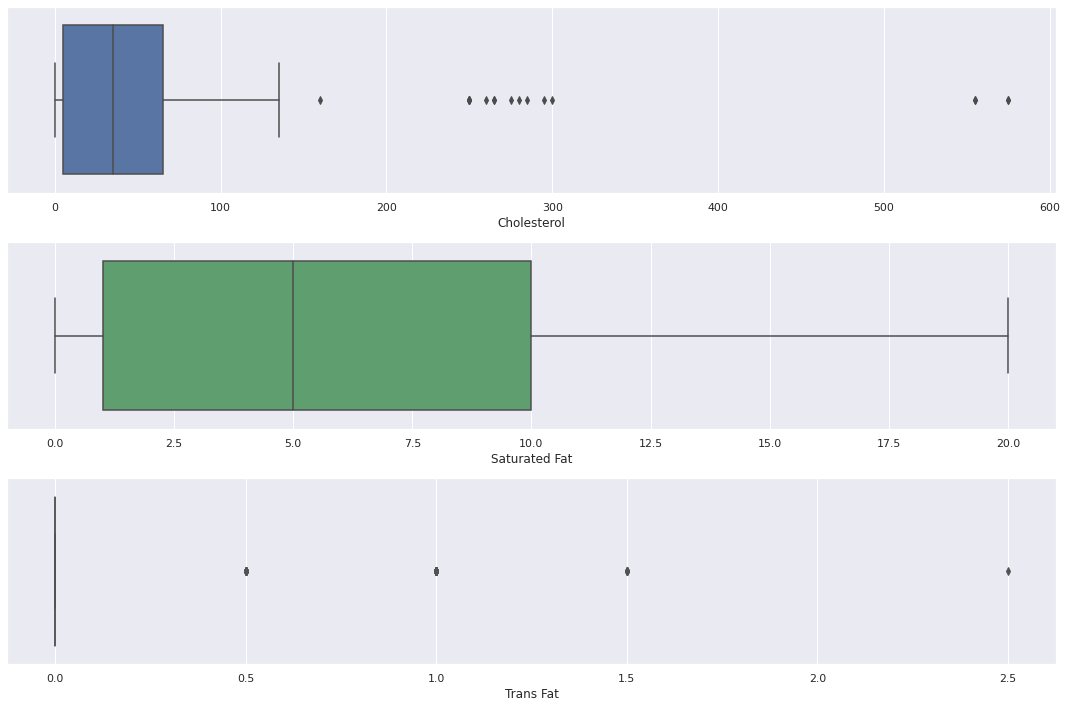

In [ ]:
diagrama_de_caixa('Cholesterol', 'Saturated Fat', 'Trans Fat')

Cálculo da Média e Mediana da categoria Colesterol

In [ ]:
print(f'Média Colesterol: {mc_df["Cholesterol"].mean()}')
print(f'Mediana Colesterol: {mc_df["Cholesterol"].median()}')

Média Colesterol: 54.94230769230769
Mediana Colesterol: 35.0


####Observação
<p>Analisando o gráfico "Colesterol", novamente podemos notar o peso das categorias "Café e Chá" e "Café da Manhã", opções consideravelmente mais saudáveis. Valores acima de 130 são considerados <b>outliers</b> e, devido ao grande número destes, a média dessa categoria foi "puxada" para cima, tornando a <b>mediana</b> um valor mais seguro para se ter como base.</p>

###Sódio, Fibras e Açúcares

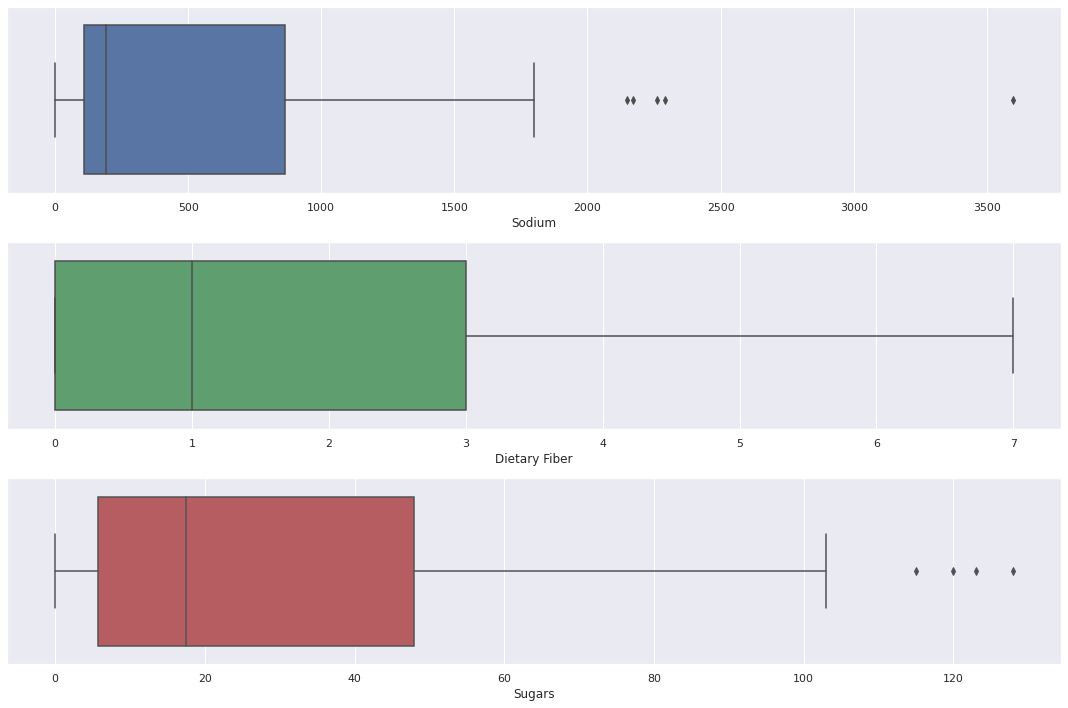

In [ ]:
diagrama_de_caixa('Sodium', 'Dietary Fiber', 'Sugars')

###Proteínas, Carboidratos e Fibras

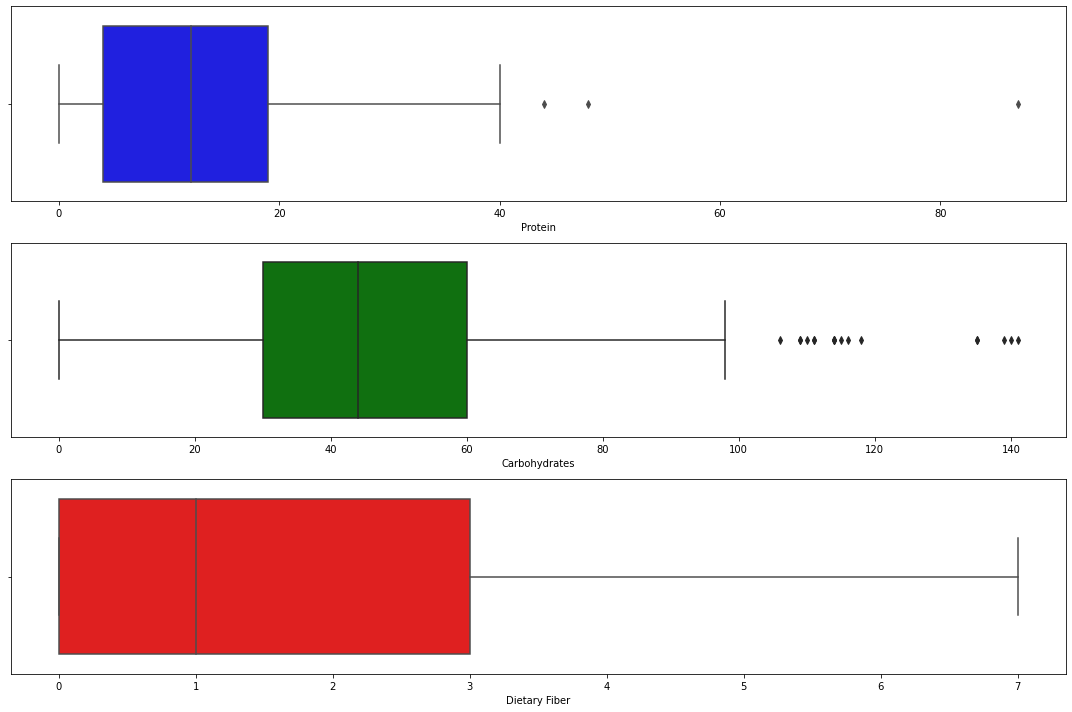

In [ ]:
diagrama_de_caixa("Protein", "Carbohydrates", "Dietary Fiber")

In [ ]:
print(f'Média Carboidratos: {mc_df["Carbohydrates"].mean()}')
print(f'Mediana Carboidratos: {mc_df["Carbohydrates"].median()}')

Média Carboidratos: 47.34615384615385
Mediana Carboidratos: 44.0


In [ ]:
print(f'Média Proteína: {mc_df["Protein"].mean()}')
print(f'Mediana Proteína: {mc_df["Protein"].median()}')

Média Proteína: 13.338461538461539
Mediana Proteína: 12.0


###Correlação entre as variáveis
<p>Valores variam de 0 a 1. Quando mais próxima a 1, mais forte a correlação entre as variáveis.</p>

In [ ]:
correlacao = mc_df.corr()
correlacao

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,0.846624,...,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,0.846158,...,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,0.846728,...,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.712309,0.846624,0.846158,0.846728,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,...,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


####Mapa de Calor

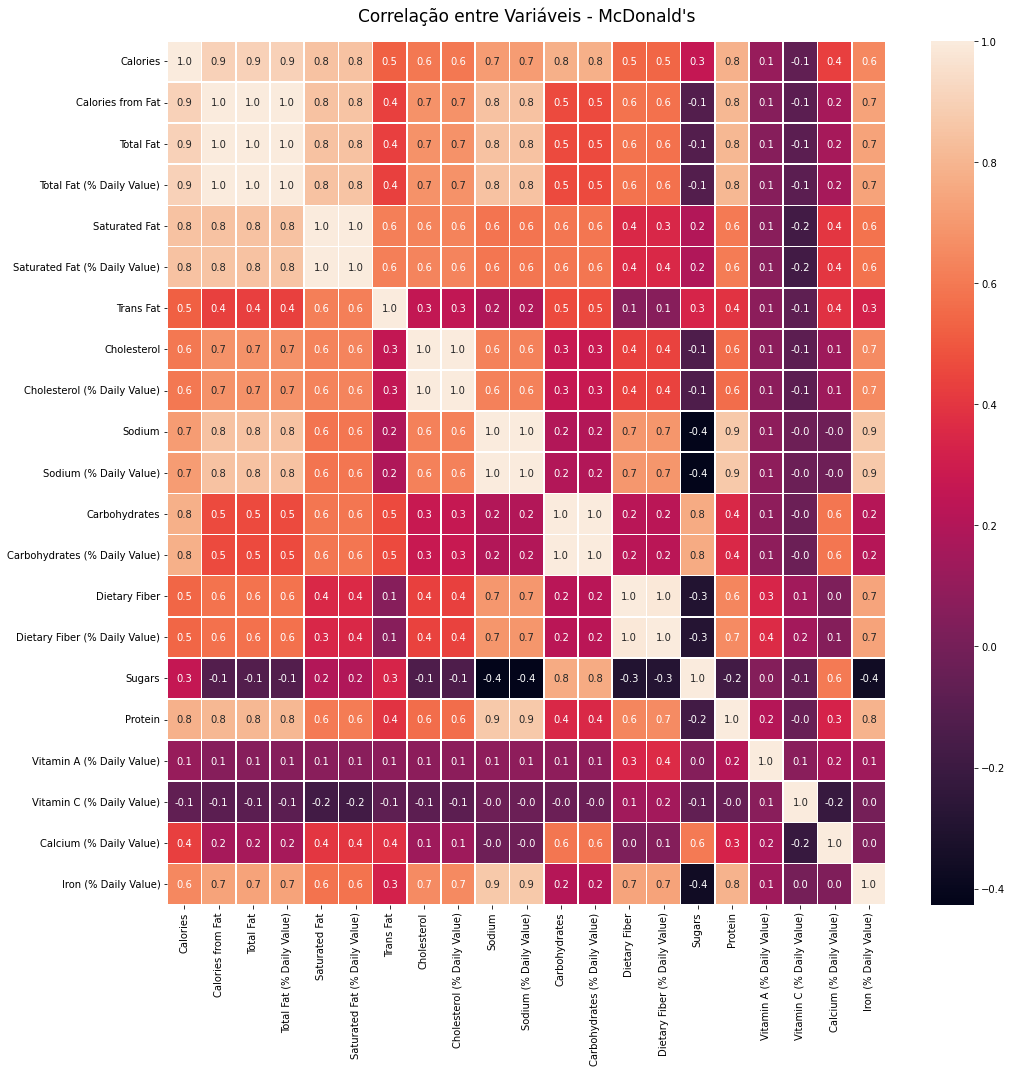

In [ ]:
mapa_calor, eixo = plt.subplots(figsize=(15,15))
sns.heatmap(correlacao, annot=True, linewidths=0.7, fmt='.1f', ax=eixo)

plt.title("Correlação entre Variáveis - McDonald's", fontsize= 17, pad=20)
plt.show()

####Observação
<p>Podemos notar uma forte correlação entre diversas variáveis, especialmente envolvendo Proteína, Calorias, Gordura e Sódio. Valores próximos a 1 indicam uma forte correlação positiva, ou seja, o aumento em uma variável ocasiona o aumento da outra. Já valores próximos a -1 indicam uma forte correlação negativa, onde o aumento em uma variável implica na diminuição da outra. </p>

In [ ]:
mc_df.query('Sodium>1700').value_counts()

Category        Item                                                          Serving Size     Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  Cholesterol (% Daily Value)  Sodium  Sodium (% Daily Value)  Carbohydrates  Carbohydrates (% Daily Value)  Dietary Fiber  Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)
Breakfast       Big Breakfast with Hotcakes (Large Biscuit)                   15.3 oz (434 g)  1150      540                60.0       93                         20.0           100                            0.0        575          192                          2260    94                      116            39                             7              28                             17      36       15                         2                          30                       40               

###Média Calórica por Categoria.

In [ ]:
med_calorias = mc_df.drop('Item', axis=1).groupby(['Category'])['Calories'].mean().sort_values(ascending=False)
calorias = med_calorias.reset_index()
calorias

,Category,Calories
0,Chicken & Fish,552.962963
1,Smoothies & Shakes,531.428571
2,Breakfast,526.666667
3,Beef & Pork,494.000000
4,Coffee & Tea,283.894737
5,Salads,270.000000
6,Snacks & Sides,245.769231
7,Desserts,222.142857
8,Beverages,113.703704


Plotando um Gráfico de Barras

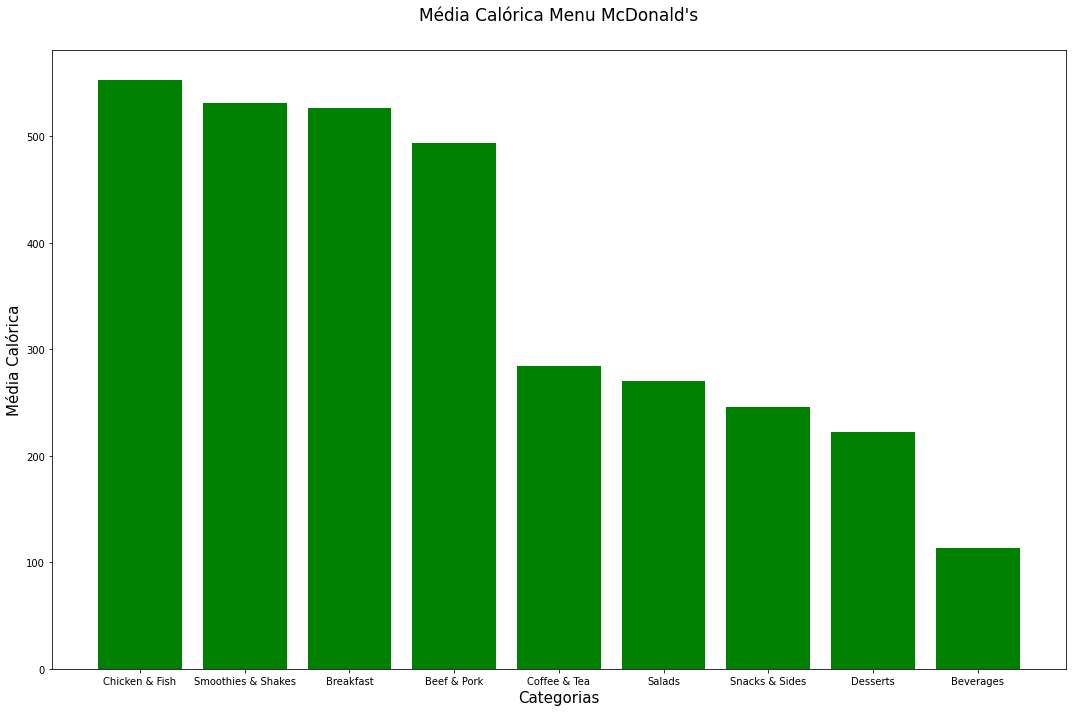

In [ ]:
plt.bar(calorias['Category'], calorias['Calories'], color='green')
plt.title("Média Calórica Menu McDonald's", pad=30, fontsize=17)
plt.xlabel('Categorias', size=15)
plt.ylabel('Média Calórica', size=15)
plt.autoscale(True)
plt.show()

###O Café da Manhã do McDonald's é realmente saudável?
<p>Colesterol é um composto gorduroso fundamental para o bom funcionamento do organismo. Entretanto, o Mau Colesterol, também conhecido como LDL, transporta gordura do fígado para outras partes do organismo, ocasionando entupimento de vasos sanguíneos e, possivelmente, ataques cardíacos e acidentes vasculares cerebrais.</p>

In [ ]:
# calculo da média do colesterol do café do McDonald's
cafe_mc = mc_df[mc_df['Category'] == 'Breakfast']
cafe_mc.Cholesterol.mean()

152.85714285714286

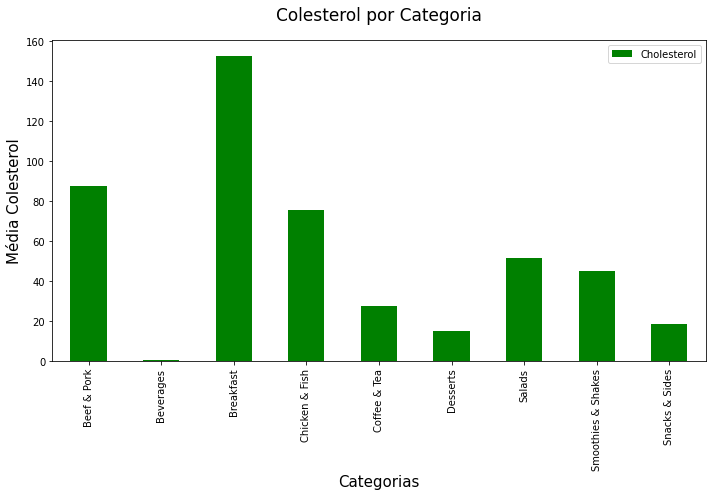

In [ ]:
mc_df.pivot_table('Cholesterol', 'Category').plot(kind='bar', stacked=True, color = 'g', figsize=(10,7))
plt.xlabel('Categorias', size=15)
plt.ylabel('Média Colesterol', size=15)
plt.title('Colesterol por Categoria', size=17, pad=20)
plt.show()

Como pode-se observar, a categoria 'Café da Manhã' possui a mais alta média dentre as demais. Portanto, pense duas vezes antes de optar por um café da manhã dessa rede.

### Mas e se utilizarmos a mediana ao invés da média?

In [ ]:
# calculo da média do colesterol do café do McDonald's
cafe_mc = mc_df[mc_df['Category'] == 'Breakfast']
cafe_mc.Cholesterol.median()


50.0

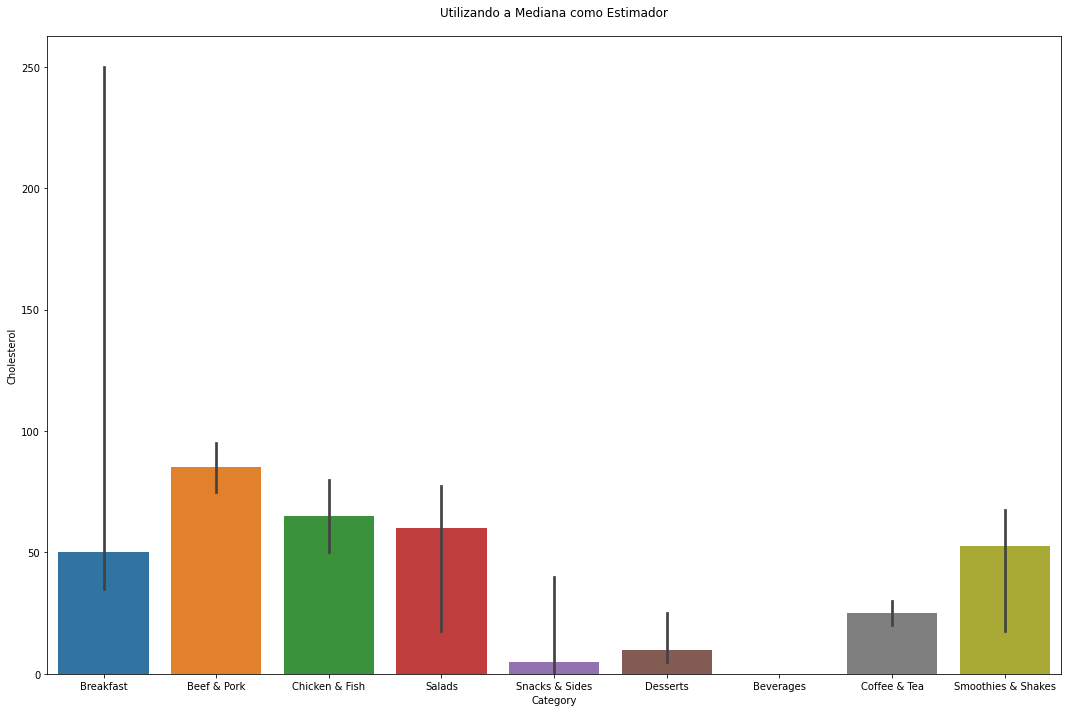

In [ ]:
# importando biblioteca necessária
from numpy import median
sns.barplot(x=mc_df["Category"], y=mc_df["Cholesterol"], estimator=median)
plt.title("Utilizando a Mediana como Estimador", pad=20)
plt.show()

Utilizando a Mediana como estimador o cenário muda considevelmente. Logo, podemos concluir que o Café da Manhã da rede McDonald's possui alguns itens com quantidades exorbitantes (<b>outliers</b>) de Colesterol, o que acaba ocasionando o aumento da média geral da categoria.

###Distribuição Calórica dos Itens do Menu.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


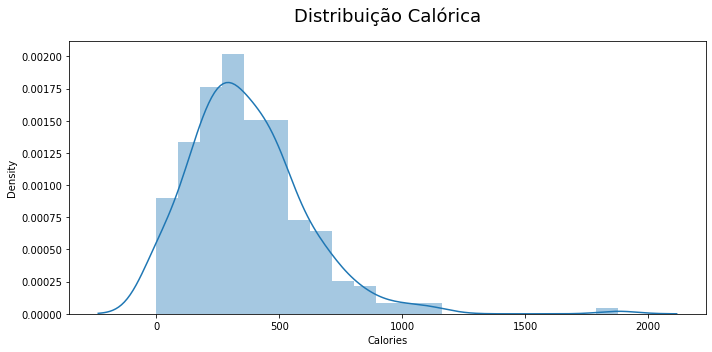

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(mc_df['Calories'])
plt.title('Distribuição Calórica', size=18, pad=20)
plt.show()

O apesar da longa cauda pra esquerda, o gráfico apresenta uma distribuição relativamente normal.

###Encerro assim esta minha simples análise.